<a href="https://colab.research.google.com/github/Saurabhbaghel/ocr-e-learning-workbooks/blob/main/basic_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Doctr for torch

In [ ]:
! pip install python-doctr[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━

# Installing some fonts for rendering

In [ ]:
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 2,440 kB of archives.
After this operation, 6,705 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 fonts-freefont-ttf all 20120503-10 [2,440 kB]
Fetched 2,440 kB in 1s (2,593 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading database ... 

# Importing Libraries

In [ ]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

# Downloading a sample file

In [ ]:
# Download a sample
!wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
doc = DocumentFile.from_pdf("Cash-Payment-Receipt-Template.pdf")
print(f"Number of pages: {len(doc)}")

--2023-03-23 08:41:17--  https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
Resolving eforms.com (eforms.com)... 172.67.185.85, 104.21.92.25, 2606:4700:3031::ac43:b955, ...
Connecting to eforms.com (eforms.com)|172.67.185.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [application/pdf]
Saving to: ‘Cash-Payment-Receipt-Template.pdf’

Cash-Payment-Receip 100%[===================>]  15.70K  --.-KB/s    in 0s      

2023-03-23 08:41:17 (83.8 MB/s) - ‘Cash-Payment-Receipt-Template.pdf’ saved [16080/16080]

Number of pages: 1


# Instantiating an end-to-end predictor model

In [ ]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


  0%|          | 0/101971449 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [ ]:
result = predictor(doc)

# Visualizing the result

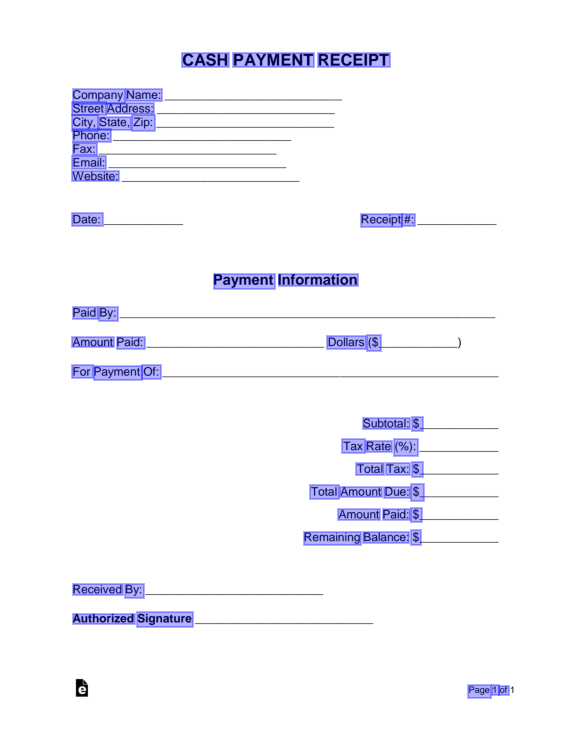

In [ ]:
result.show(doc)

# Exporting result as JSON or XML

In [ ]:
result.export()

{'pages': [{'page_idx': 0,
   'dimensions': (1584, 1224),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((0.314453125, 0.0634765625),
      (0.6875, 0.083984375)),
     'lines': [{'geometry': ((0.314453125, 0.0634765625),
        (0.6875, 0.083984375)),
       'words': [{'value': 'CASH',
         'confidence': 0.9991496801376343,
         'geometry': ((0.314453125, 0.064453125), (0.3984375, 0.0830078125))},
        {'value': 'PAYMENT',
         'confidence': 0.9999822378158569,
         'geometry': ((0.40625, 0.0634765625), (0.5517578125, 0.083984375))},
        {'value': 'RECEIPT',
         'confidence': 0.9982283711433411,
         'geometry': ((0.55859375, 0.0634765625), (0.6875, 0.083984375))}]}],
     'artefacts': []},
    {'geometry': ((0.115234375, 0.11328125), (0.2783203125, 0.3037109375)),
     'lines': [{'geometry': ((0.1171875, 0.11328125),
        (0.2783203125, 0.134765625)),
       'wo

In [ ]:
result.export_as_xml()

[(b'<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><title>docTR - XML export (hOCR)</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="ocr-system" content="python-doctr v0.6.0" /><meta name="ocr-capabilities" content="ocr_page ocr_carea ocr_par ocr_line ocrx_word" /></head><body><div class="ocr_page" id="page_1" title="image; bbox 0 0 1224 1584; ppageno 0" /><div class="ocr_carea" id="block_1" title="bbox 385 101                     842 133"><p class="ocr_par" id="par_1" title="bbox 385 101                     842 133"><span class="ocr_line" id="line_1" title="bbox 385 101                         842 133;                         baseline 0 0; x_size 0; x_descenders 0; x_ascenders 0"><span class="ocrx_word" id="word_1" title="bbox 385 102                             488 131;                             x_wconf 100">CASH</span><span class="ocrx_word" id="word_2" title="bbox 497 101                             675 133;                  